In [1]:
from astropy.io import ascii
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy import asarray as ar, exp
from scipy.optimize import curve_fit, least_squares

%matplotlib inline

snls_colors = {"sdssg":"darkgreen", "sdssi":"darkblue", "sdssr":"darkred", "sdssz":"purple"}

In [2]:
def show_multi_filter_light_curve(t, colors, n_factor = None):

    t_by_filter = t.group_by("bandpass")

    indices = t_by_filter.groups.indices
    #print indices

    for i in range(0, len(indices)-1):

        data = t_by_filter[indices[i]:indices[i+1]]
        
        if n_factor is not None:
            value = n_factor[data[0]["bandpass"]]
            f = value if np.isnan(value) == False else 1
            plt.errorbar(data["mjd"], data["flux"]*f,yerr=data["flux_error"]*f, fmt='.', markersize='5', label=data[0]["bandpass"], c=colors[data[0]["bandpass"]])            
        else:
            plt.errorbar(data["mjd"], data["flux"],yerr=data["flux_error"], fmt='.', markersize='5', label=data[0]["bandpass"], c=colors[data[0]["bandpass"]])
    plt.legend()
    #plt.show()

In [3]:
def get_max_index(fluxes):
    max_val = 0
    max_index = -1
    for i, elem in enumerate(fluxes):
        
        if max_val<elem:
            max_val = elem
            max_index = i
            
    return max_index

In [4]:
def mod_gauss(t, a, t0, tf, tr, b):
    return a*((exp(-(t-t0)/tf))/(1+exp(-(t-t0)/tr)))+b

def gauss(x, a, x0, sigma, b):
    return a*exp(-(x-x0)**2/(2*sigma**2))+b


def residuals(p, x, y):
    a, m, s, b = p
    y_fit = gauss(x, a, m, s, b)
    
    err = y - y_fit
    return err
    

In [5]:
print mod_gauss(1,1,1,1,1,1)

1.5


In [18]:
x = np.arange(100, dtype=np.float)
y = np.zeros_like(x)
yn = y + np.random.normal(size=len(y))
y

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [41]:
def show_fit_mod_gaussians(t, colors, n_factor = None):

    t_by_filter = t.group_by("bandpass")
    min_date = min(t["mjd"])
    max_date = max(t["mjd"])
    
    indices = t_by_filter.groups.indices
    max_i = get_max_index(t_by_filter["flux"])
    mean_date = t_by_filter[max_i]["mjd"]-min_date
    
  
    for i in range(0, len(indices)-1):

        data = t_by_filter[indices[i]:indices[i+1]]
        x = data["mjd"]-min_date
        y = data["flux"]
        
        n = len(x)
        sigma = np.std(y)
        
      
        popt, pcov = curve_fit(mod_gauss, x, y, p0=[1, mean_date, 1, 1, 0], maxfev=5000,  sigma = data["flux_error"])
        
        
        c = (y - mod_gauss(x, *popt))
        chi = (y - mod_gauss(x, *popt))/data["flux_error"]
        chi2 = (chi**2).sum()
        print chi2
        print len(x) - len(popt)
        
        plt.plot(x, y, 'b+', color=colors[data[0]["bandpass"]])
        
        X = np.arange(0,max_date-min_date,1)
        
        plt.plot(X, mod_gauss(X, *popt), color=colors[data[0]["bandpass"]])
        #print gauss(X, *popt)
        #plt.xlim(xmin=400, xmax=500)
        #plt.show()
        #plt.legend()
    
    return popt, pcov, c
    plt.show()

In [26]:
def show_fit_gaussians(t, colors, n_factor = None):

    t_by_filter = t.group_by("bandpass")
    min_date = min(t["mjd"])
    max_date = max(t["mjd"])
    
    indices = t_by_filter.groups.indices
    max_i = get_max_index(t_by_filter["flux"])
    mean_date = t_by_filter[max_i]["mjd"]-min_date
    
  
    for i in range(0, len(indices)-1):

        data = t_by_filter[indices[i]:indices[i+1]]
        x = data["mjd"]-min_date
        y = data["flux"]
        
        n = len(x)
        sigma = np.std(y)
        
      
        popt, pcov = curve_fit(gauss, x, y, p0=[1, mean_date, sigma, 1], sigma = data["flux_error"])
        
        plt.plot(x, y, 'b+', color=colors[data[0]["bandpass"]])
        
        X = np.arange(0,max_date-min_date,1)
        
        plt.plot(X, gauss(X, *popt), color=colors[data[0]["bandpass"]])
        #print gauss(X, *popt)
        #plt.xlim(xmin=400, xmax=500)
        #plt.show()
        #plt.legend()
        
        
    plt.show()

In [8]:
curves = [554000,   20003,  362011,   69015,  393015,  367516,  161020,  275024,
  254525,  488529,  353043,  323044,  275045,  427057,  334559,  237060,
  152584,   96086,  378589,  528591,  530591,  499597,  364100,  205609,
  238624,  171628,  215129,  548130,  508136,  275139,  282642,  489662,
  328663,  300671,  603671,  252672,  162173,  563183,  199187,  320194,
  589709,  181218,  354226,  321730,  375231,  371244,  588754,  169755,
  100761,  102262,  409763,  452764,  491269,  585770,  320271,  391771,
  307774,  452780,  103782,  450288,  159790,  277301,  270321,   84323,
  305823,  560323,  152326,  447832,  146839,  145345,  238345,   69346,
   86347,  231850,   72360,  536862,  201863,  220368,  437374,  157377,
  295384,  606385,  168391,  454891,  150894,  152407,    8910,  527422,
  330434,  532940,  607447,  563958,  550462,  527464,  206968,  275472,
  387472,  541474,  352982,  354483,  538486,  127487,  395488,   51991,
   51997,]
lcs = []
for c in curves:

    lienObj = glob.glob("/datadec/cppm/jpreyes/mpi_tests/multicolour_set/"+str(c)+".dat")


    for oj in lienObj:
        table = ascii.read(oj)
        lcs.append(table)
        break

#show_multi_filter_light_curve(lcs[0], snls_colors)

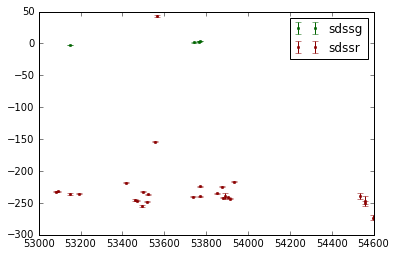

In [29]:
lc = lcs[11]

show_multi_filter_light_curve(lc, snls_colors)

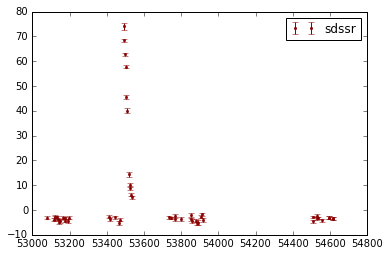

In [10]:
lc = lcs[45]
mask = lc["bandpass"] == "sdssr"
lc_i = lc[mask]
show_multi_filter_light_curve(lc_i, snls_colors)

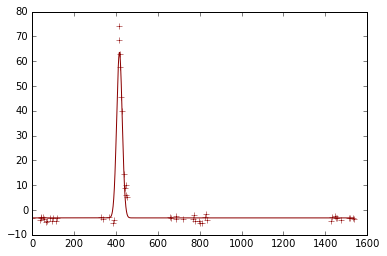

In [27]:
show_fit_gaussians(lc_i, snls_colors)

/renoir_data_00/fouchez/lsst/DM/stacks/lsstsw/2017-05-04/lsstsw/miniconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/renoir_data_00/fouchez/lsst/DM/stacks/lsstsw/2017-05-04/lsstsw/miniconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  


195.666921654
48


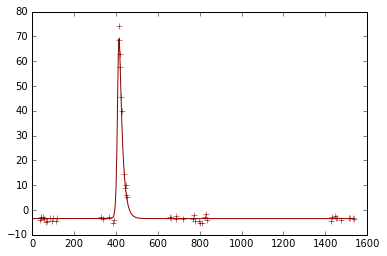

In [42]:
popt, pcov, c = show_fit_mod_gaussians(lc_i, snls_colors)

In [49]:
len(c)

53

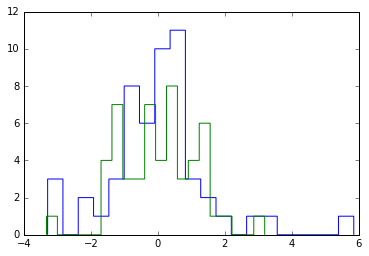

In [53]:
s = np.random.normal(0,1,53)
plt.hist(c, histtype="step", bins=20)
plt.hist(s, histtype="step", bins=20)
plt.show()

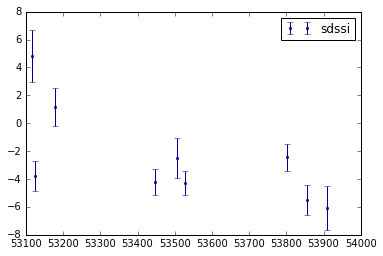

In [52]:
lc = lcs[0]
mask = lc["bandpass"] == "sdssi"
lc_i = lc[mask]
show_multi_filter_light_curve(lc_i, snls_colors)

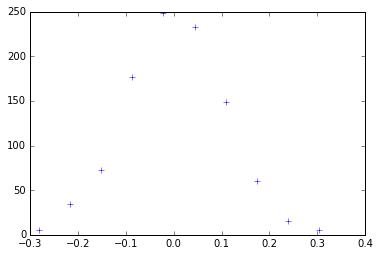

In [59]:
x0, sigma = 0, 0.1
y, xe  = np.histogram(np.random.normal(x0, sigma, 1000))
x = .5 * (xe[:-1] + xe[1:])

plt.plot(x,y, "b+")

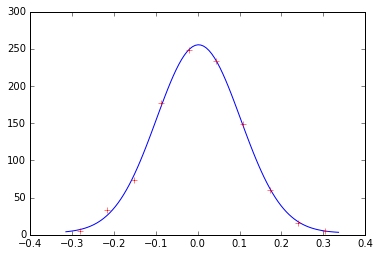

In [60]:
p0 = [1., 1., 1., 1.]
# Fit the data with the function
fit, tmp = curve_fit(gauss, x, y, p0=p0)
x_fine = np.linspace(xe[0], xe[-1], 100)
plt.plot(x_fine, gauss(x_fine, fit[0], fit[1], fit[2], fit[3]), 'b-')
plt.plot(x,y, "r+")

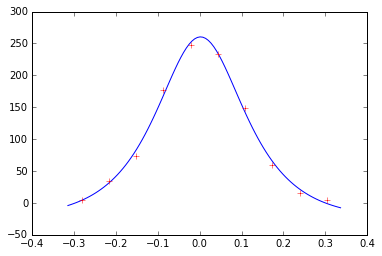

In [61]:
p0 = [1., 1., 1., 1., 1.]
# Fit the data with the function
fit, tmp = curve_fit(mod_gauss, x, y, p0=p0, maxfev=10000)
x_fine = np.linspace(xe[0], xe[-1], 100)
plt.plot(x_fine, mod_gauss(x_fine, fit[0], fit[1], fit[2], fit[3], fit[4]), 'b-')
plt.plot(x,y, "r+")